<a href="https://colab.research.google.com/github/Jayasri02Sridharan/Reinsurance-Pricing-Claim-Simulation/blob/main/1_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loss/train.csv")
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
print("Size of the dataset: ", df.shape)

Size of the dataset:  (188318, 132)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [ ]:
df.describe(include="all").T.head(30)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,188318.0,NaN,NaN,NaN,294135.982561,169336.084867,1.0,147748.25,294539.5,440680.5,587633.0
cat1,188318,2,A,141550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat2,188318,2,A,106721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat3,188318,2,A,177993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat4,188318,2,A,128395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat5,188318,2,A,123737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat6,188318,2,A,131693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat7,188318,2,A,183744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat8,188318,2,A,177274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat9,188318,2,A,113122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

,0


In [ ]:
(df.isnull().mean()*100).sort_values(ascending=False).head(20)

,0
id,0.0
cat1,0.0
cat2,0.0
cat3,0.0
cat4,0.0
cat5,0.0
cat6,0.0
cat7,0.0
cat8,0.0
cat9,0.0


In [ ]:
print("Loss column exists:", "loss" in df.columns)
df["loss"].head()

Loss column exists: True


,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85


In [ ]:
df["loss"].describe(percentiles=[0.5, 0.9, 0.95, 0.99, 0.995])

,loss
count,188318.000000
mean,3037.337686
std,2904.086186
min,0.670000
50%,2115.570000
90%,6401.743000
95%,8508.536500
99%,13981.203000
99.5%,16616.923050
max,121012.250000


In [ ]:
df["loss"] = df["loss"].replace([np.inf, -np.inf], np.nan)

df_clean = df.dropna(subset=["loss"]).copy()
df_clean = df_clean[df_clean["loss"] > 0]

print("Original rows:", len(df))
print("After cleaning:", len(df_clean))

Original rows: 188318
After cleaning: 188318


In [ ]:
df_clean["loss"].sort_values(ascending=False).head(10)

,loss
53551,121012.25
83871,106863.00
14969,85923.56
172883,79623.52
81475,67667.16
125668,67537.73
113176,59826.79
120773,57224.55
158777,54190.39
13030,51383.04


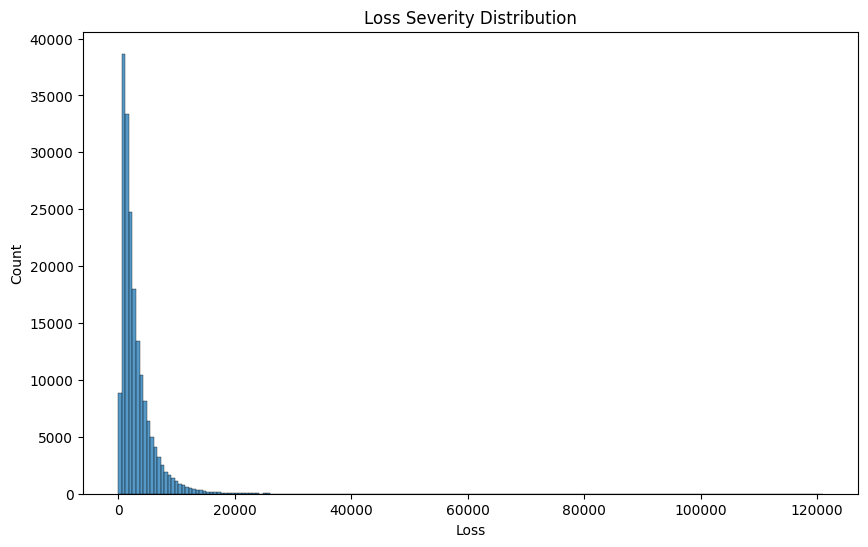

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean["loss"], bins=200)
plt.title("Loss Severity Distribution")
plt.xlabel("Loss")
plt.ylabel("Count")
plt.show()

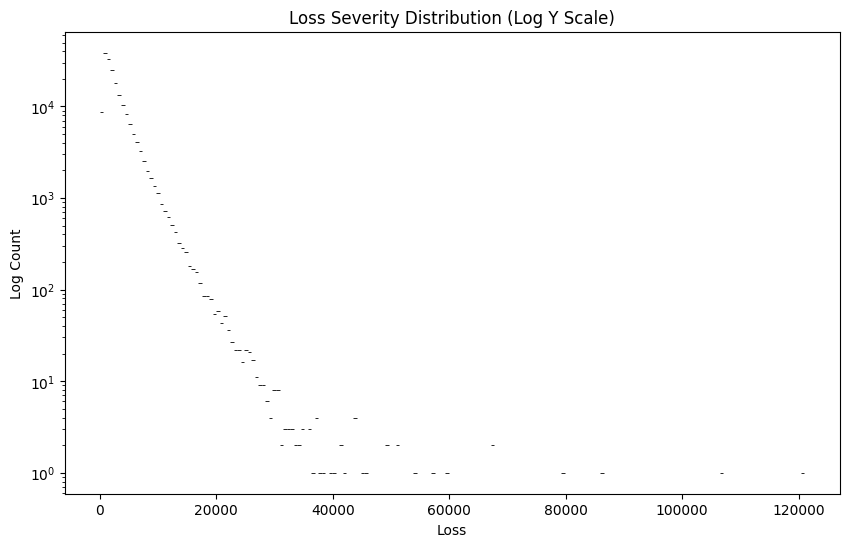

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean["loss"], bins=200, color="red", alpha=1, edgecolor="black", linewidth=0.6, log_scale=(False, True))
plt.title("Loss Severity Distribution (Log Y Scale)")
plt.xlabel("Loss")
plt.ylabel("Log Count")
plt.show()

In [ ]:
print("Skewness:", df_clean["loss"].skew())
print("Kurtosis:", df_clean["loss"].kurtosis())

Skewness: 3.7949583775378604
Kurtosis: 48.07956782541841


In [ ]:
np.random.seed(42)

df_clean["accident_year"] = np.random.choice(
    [2018, 2019, 2020, 2021, 2022, 2023],
    size=len(df_clean),
    p=[0.10, 0.15, 0.20, 0.20, 0.20, 0.15]
)

In [ ]:
freq_table = df_clean.groupby("accident_year").size().reset_index(name="claim_count")
freq_table

,accident_year,claim_count
0,2018,18882
1,2019,28140
2,2020,37518
3,2021,37742
4,2022,37798
5,2023,28238


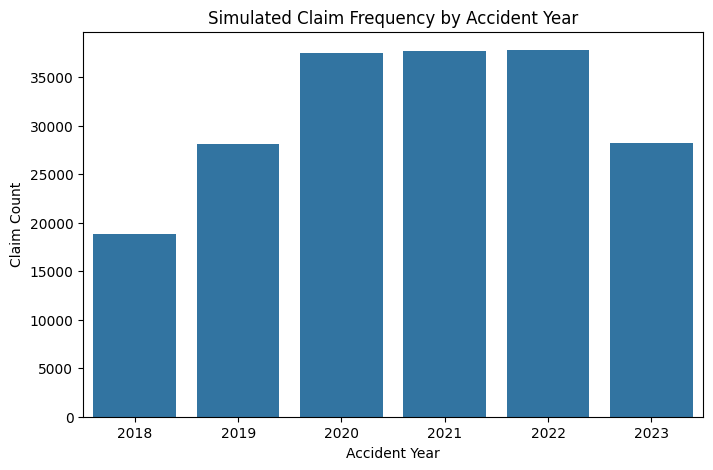

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=freq_table, x="accident_year", y="claim_count")
plt.title("Simulated Claim Frequency by Accident Year")
plt.xlabel("Accident Year")
plt.ylabel("Claim Count")
plt.show()

In [ ]:
cpi_table = pd.DataFrame({
    "accident_year": [2018, 2019, 2020, 2021, 2022, 2023],
    "cpi_index": [95, 100, 105, 112, 120, 130]
})

cpi_table

,accident_year,cpi_index
0,2018,95
1,2019,100
2,2020,105
3,2021,112
4,2022,120
5,2023,130


In [ ]:
df_clean = df_clean.merge(cpi_table, on="accident_year", how="left")
df_clean.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,accident_year,cpi_index
0,1,A,B,A,B,A,A,A,A,B,...,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,2020,105
1,2,A,B,A,A,A,A,A,A,B,...,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,2023,130
2,5,A,B,A,A,B,A,A,A,B,...,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,2022,120
3,10,B,B,A,B,A,A,A,A,B,...,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,2021,112
4,11,A,B,A,B,A,A,A,A,B,...,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,2019,100


In [ ]:
base_cpi = cpi_table.loc[cpi_table["accident_year"] == 2023, "cpi_index"].values[0]

df_clean["inflation_factor"] = base_cpi / df_clean["cpi_index"]
df_clean["loss_infl_adj"] = df_clean["loss"] * df_clean["inflation_factor"]

df_clean[["loss", "accident_year", "cpi_index", "inflation_factor", "loss_infl_adj"]].head()

,loss,accident_year,cpi_index,inflation_factor,loss_infl_adj
0,2213.18,2020,105,1.238095,2740.127619
1,1283.60,2023,130,1.000000,1283.600000
2,3005.09,2022,120,1.083333,3255.514167
3,939.85,2021,112,1.160714,1090.897321
4,2763.85,2019,100,1.300000,3593.005000


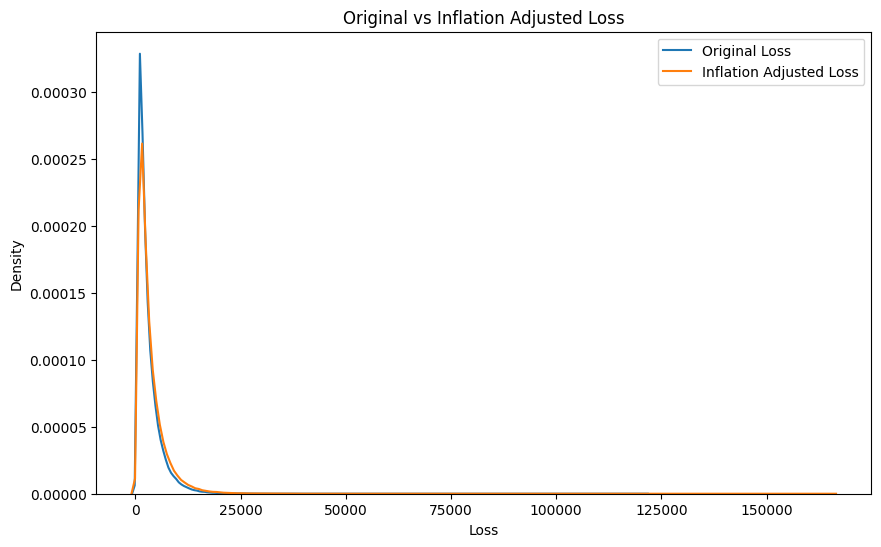

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_clean["loss"], label="Original Loss")
sns.kdeplot(df_clean["loss_infl_adj"], label="Inflation Adjusted Loss")
plt.title("Original vs Inflation Adjusted Loss")
plt.xlabel("Loss")
plt.legend()
plt.show()

In [ ]:
os.makedirs("data/processed", exist_ok=True)

df_clean.to_csv("data/processed/allstate_cleaned_claims.csv", index=False)
freq_table.to_csv("data/processed/allstate_frequency_table.csv", index=False)

print("Saved cleaned severity + frequency tables")

Saved cleaned severity + frequency tables
